In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import LocalOutlierFactor

# 1 - Análise Exploratória

In [141]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
categorical = []
numerical = []
for c in train.columns:
    if train.dtypes[c] == 'O':
        categorical.append(c)
    else:
        numerical.append(c)

print('Atributos categóricos: ')
print(categorical)
print("")
print('Atributos numéricos')
print(numerical)

Atributos categóricos: 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Atributos numéricos
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',

In [5]:
train[numerical].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
# colunas com valores nulos (19 colunas)

missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

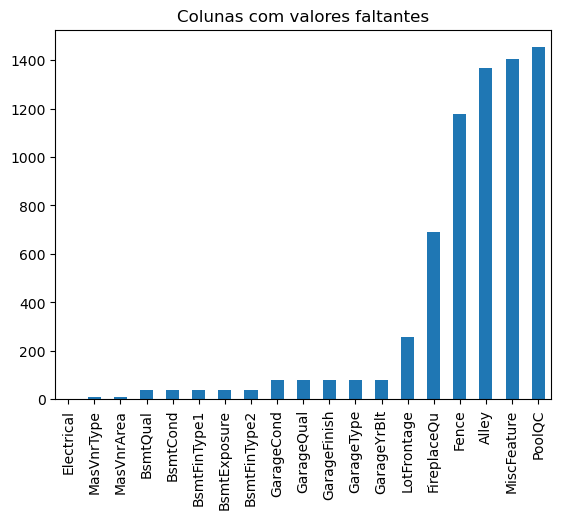

In [8]:
plt.title('Colunas com valores faltantes')
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.show()

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


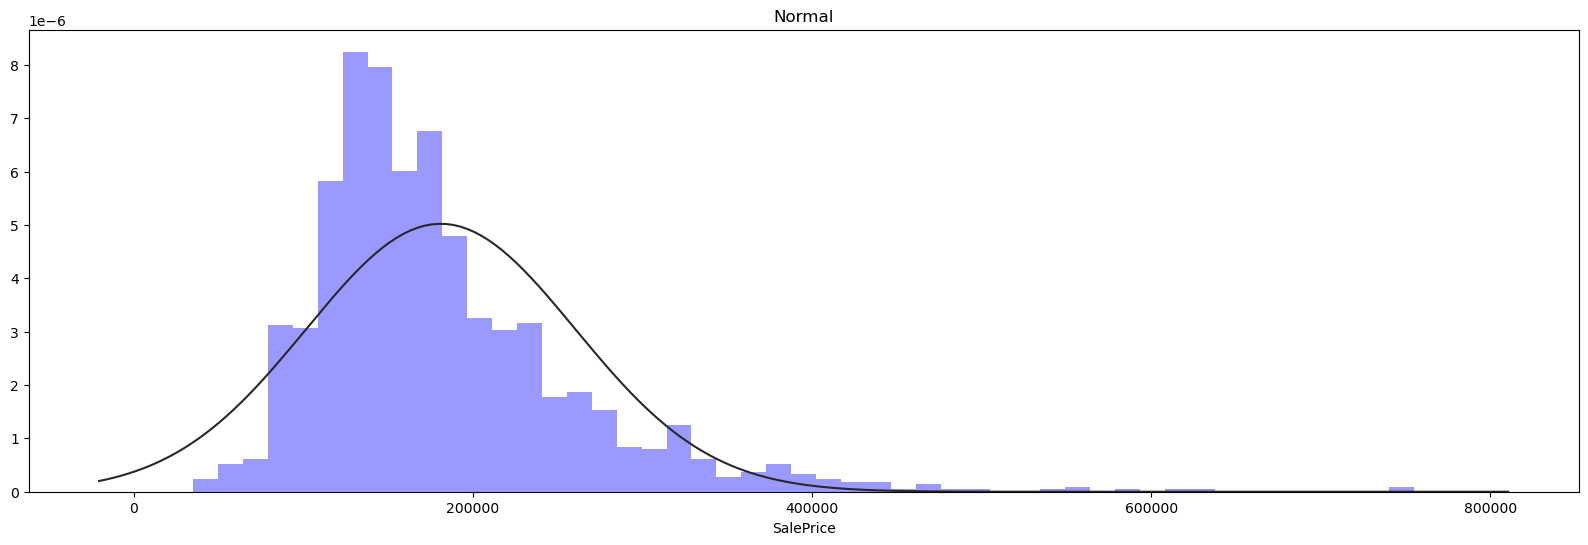

In [9]:
# gráfico de distribuição da coluna 'SalePrice' 

fig, (axis1) = plt.subplots(1,1,figsize=(20,6))
axis1.title.set_text('Normal')

sns.distplot(train['SalePrice'], kde=False, color='blue', ax=axis1, fit=stats.norm)

plt.show()

## Não segue uma distribuição normal

### será necessário fazer uma normalização

<AxesSubplot:>

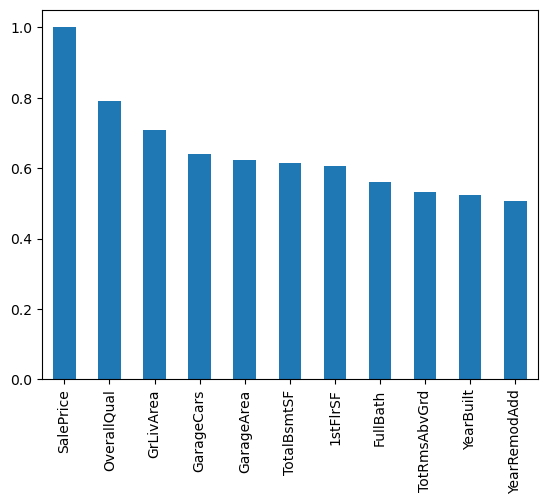

In [10]:
# ja pega automaticamente somente os valores numéricos
corr = train.corr()

# ordenando os valores (Correlação das colunas em relação a SalePrice)
SalePrice_corr=corr['SalePrice'].sort_values(ascending=False)

# 10 colunas com maiores correlações com SalePrice
top10_SalePrice_corr = SalePrice_corr[0:11]
top10_SalePrice_corr.plot.bar()

<AxesSubplot:title={'center':'HeatMap SalePrice'}>

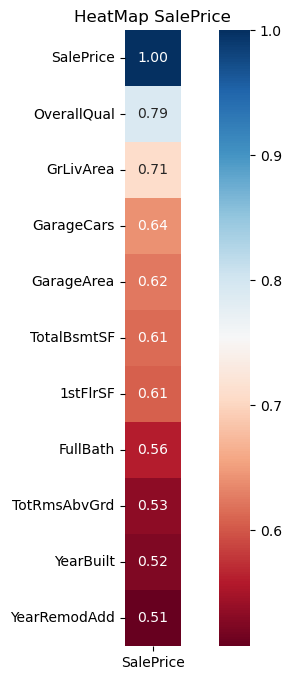

In [11]:
# transformando os 10 valores com maior correlação com SalePrice em DF
top10_SalePrice_corr = pd.DataFrame(top10_SalePrice_corr)

plt.figure(figsize=(10, 8))
plt.title('HeatMap SalePrice')
sns.heatmap(data=top10_SalePrice_corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

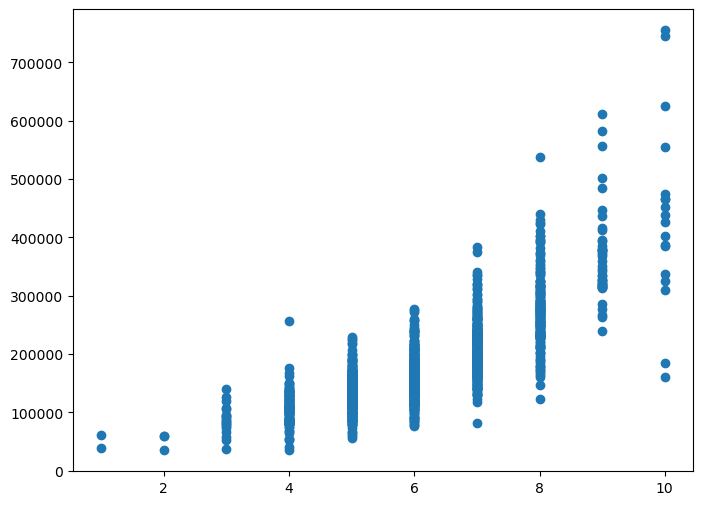

In [12]:
# bloxpot da variável com maior correlação
top10_SalePrice_corr
plt.figure(figsize=(8, 6))
plt.scatter(train['OverallQual'], train['SalePrice'])

<AxesSubplot:title={'center':'Top 10 colunas com maiores correlações com SalePrice'}>

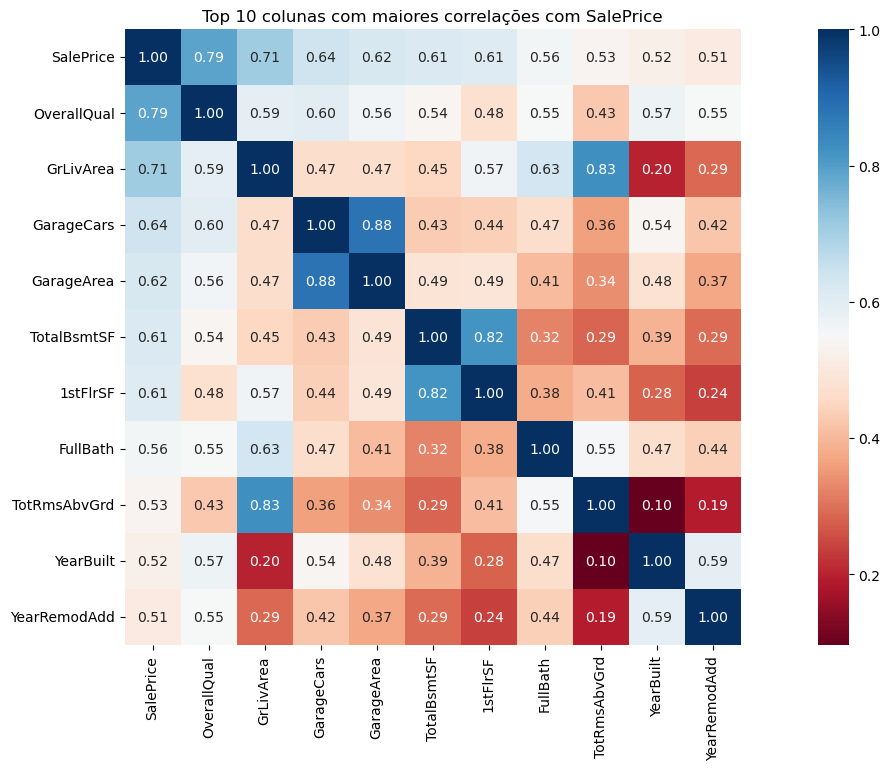

In [13]:
top_ten_corr_labels=SalePrice_corr[0:11].keys()
top_ten_corr = train[top_ten_corr_labels].corr()

plt.figure(figsize=(20,8));
plt.title('Top 10 colunas com maiores correlações com SalePrice')
sns.heatmap(data=top_ten_corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

## Através do gráfico, percebemos que as 2 variáveis que mais possuem correlação com o preço de venda da casa são: OverallQual (Qualidade do material geral e acabamento da casa) e GrLivArea (tamanho da área habitável da casa).

### Quanto melhor o acabamento, qualidade dos materiais e tamanho da casa em si, maior o preço de venda.

## Checando possíveis outliers com gráfico de dispersão (6 variáveis com maiores corr)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

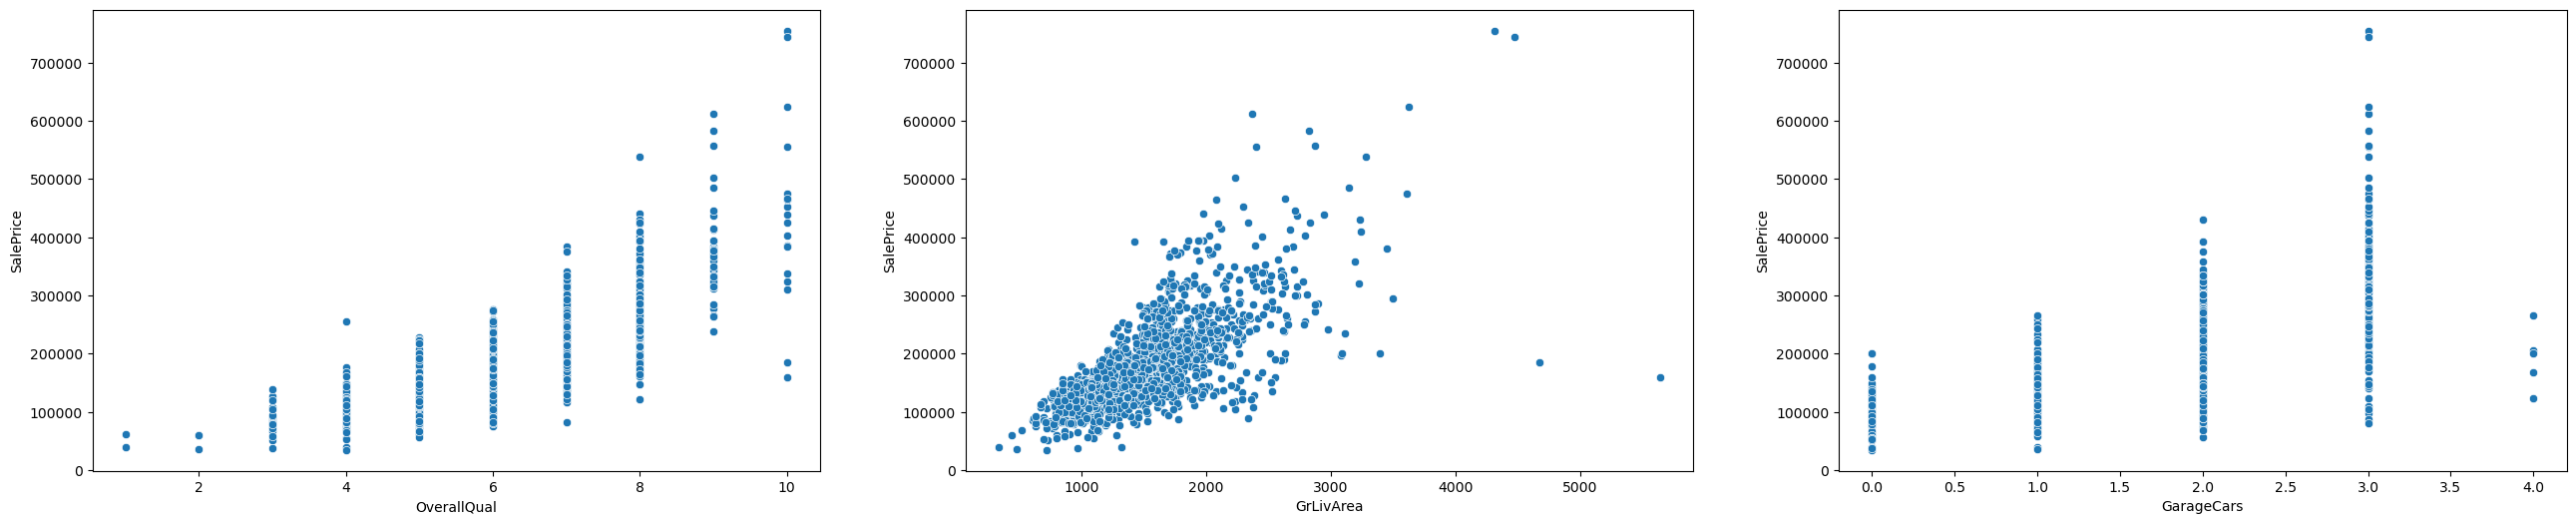

In [14]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(32,6))
sns.scatterplot(x='OverallQual',y='SalePrice',data=train, ax=axis1)
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train, ax=axis2)
sns.scatterplot(x='GarageCars',y='SalePrice',data=train, ax=axis3)

- primeiro gráfico: não possui outliers;

- segundo gráfico: possui 2 casas com GrLivArea altas e preço de venda baixos;

- terceiro gráfico: não possui outliers;

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

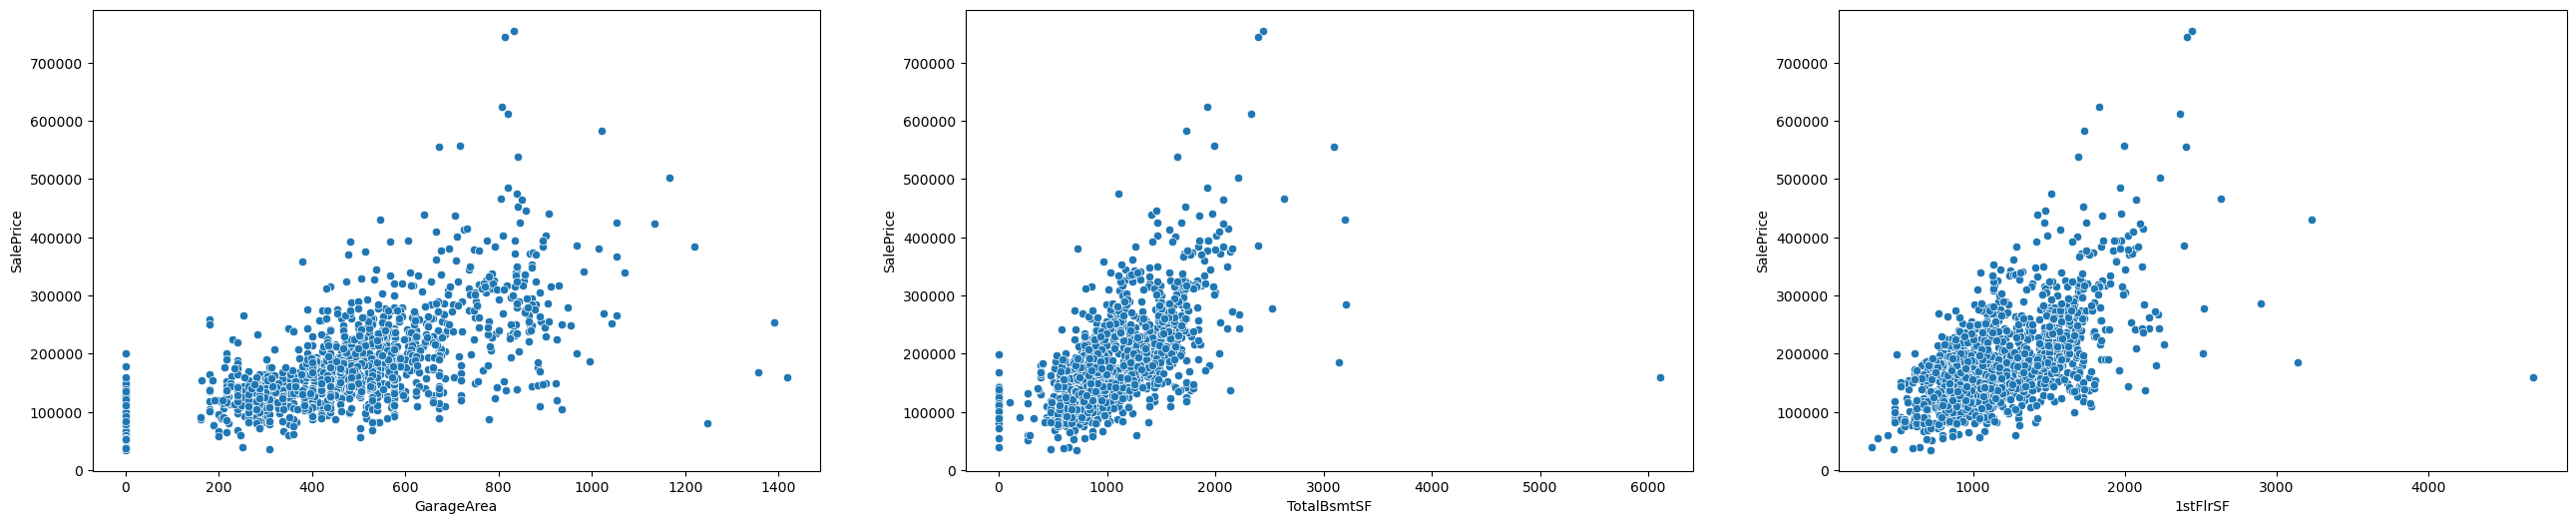

In [15]:
fig, (axis4, axis5, axis6) = plt.subplots(1,3, figsize=(32,6))
sns.scatterplot(x='GarageArea',y='SalePrice',data=train, ax=axis4)
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train, ax=axis5)
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=train, ax=axis6)

- primeiro gráfico: possui 4 casas com GarageArea grande e preço de venda baixo;
- segundo gráfico: possui 1 casa com TotalBsmtSF (área do porão) grande e preço de venda baixo;
- terceiro gráfico: possui 1 casa com 1stFlrSF (área do primeiro piso) grande e preço de venda baixo;

In [16]:
# pegando indices dos outliers visto acima

# Indexes de outliers nos preços de venda
SalePrice_Outlier_Idx = train.query('SalePrice > 700000').index.tolist()

# Indexes de outliers em GrLivArea
GrLivArea_Outlier_Idx = train.query('SalePrice < 200000 & GrLivArea > 4000').index.tolist()

# Indexes de outliers em GarageArea
GarageArea_Outlier_Idx = train.query('SalePrice < 300000 & GarageArea > 1200').index.tolist()

# Indexes de outliers em TotalBsmtSF
TotalBsmtSF_Outlier_Idx = train.query('SalePrice < 200000 & TotalBsmtSF > 6000').index.tolist()

# Indexes de outliers em 1stFlrSF
Total1stFlrSF_Outlier_Idx = train.query('SalePrice < 200000 & `1stFlrSF` > 4000').index.tolist()

In [17]:
# Lista de potenciais outliers

Potential_Outliers_Idx = SalePrice_Outlier_Idx + GrLivArea_Outlier_Idx + GarageArea_Outlier_Idx + TotalBsmtSF_Outlier_Idx + Total1stFlrSF_Outlier_Idx

# retira valores repetidos
Potential_Outliers_Idx=list(set(Potential_Outliers_Idx))

# ordena
Potential_Outliers_Idx.sort()
Potential_Outliers_Idx

[523, 581, 691, 1061, 1182, 1190, 1298]

In [18]:
# Encontrando os Outliers no DataFrame train e analisando-os

outliers = train.loc[Potential_Outliers_Idx, top_ten_corr_labels]
outliers.sort_values('SalePrice', ascending=True)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
1061,81000,3,894,3,1248,894,894,1,6,1935,1950
1298,160000,10,5642,2,1418,6110,4692,2,12,2008,2008
1190,168000,4,1622,4,1356,1249,1622,1,7,1961,1975
523,184750,10,4676,3,884,3138,3138,3,11,2007,2008
581,253293,8,2042,3,1390,2042,2042,2,8,2008,2009
1182,745000,10,4476,3,813,2396,2411,3,10,1996,1996
691,755000,10,4316,3,832,2444,2444,3,10,1994,1995


- Casas com preços maiores que 700.000: Indexes 691 and 1182
    - Não podem ser considerados outliers pelo fato de possuirem caracteristicas altas correlacionadas com o 'SalePrice'
    
- Casas com GrLivArea alto e preço baixo: Indexes 523 and 1298
    - Podem ser considerados outliers, pois não segue nenhuma lógica baseada nas caracteristicas correlacionadas;
    - Preço de venda baixo mas GrLivArea alto, maior OverallQual, garageArea grande...
- Casas com GarageArea grande e preço baixo: Indexes 581, 1061, 1190, 1298
    - Todas, com exceção do 1298, não podem ser consideradas outliers
    - O preço baixo delas é justificável pois possuem um OverallQual menor e são bem menores de tamanho em GrLivArea;
- Casa com grande area de porão e preço baixo: Index 1298
    - É considerado outlier;
    

### Portanto, podemos considerar outliers apenas os indices 523 e 1298, a partir da nossa análise

# 2 - Featuring Engineering

In [19]:
# Criando uma cópia dos datasets
preprocessing_train = train.copy()
preprocessing_test = test.copy()

In [20]:
# Retirando o ID
preprocessing_train.drop(['Id'], axis=1, inplace=True)
preprocessing_test.drop(['Id'], axis=1, inplace=True)

# Retirando os 2 outliers do DataFame
preprocessing_train = preprocessing_train[preprocessing_train.GrLivArea < 4500]
preprocessing_train.reset_index(drop=True, inplace=True)

### Fazendo a normalização dos dados com [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


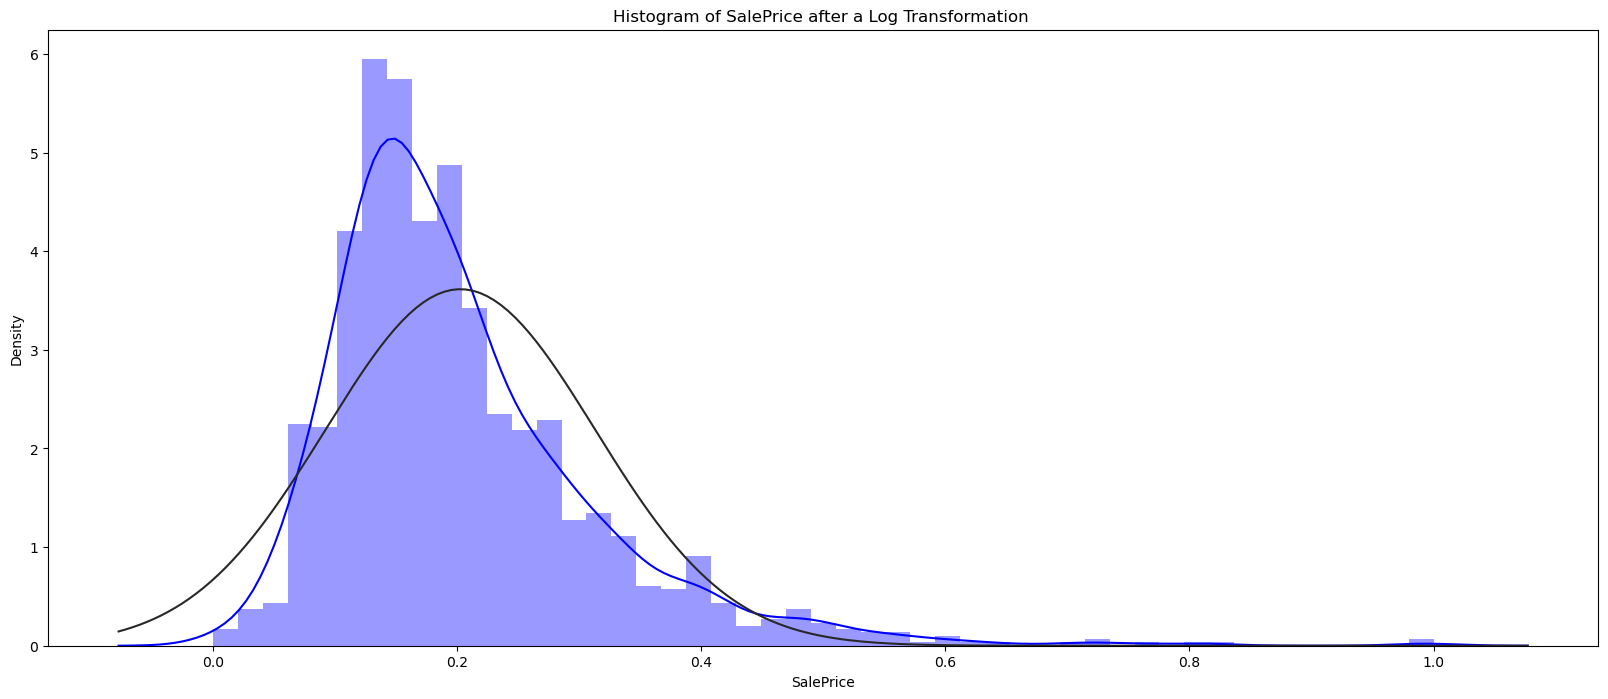

In [21]:
scaler = MinMaxScaler()

# Normalizar os dados
preprocessing_train['SalePrice'] = scaler.fit_transform(preprocessing_train[['SalePrice']])

plt.figure(figsize=(20,8));
plt.title('Histogram of SalePrice after a Log Transformation ')
sns.distplot(preprocessing_train['SalePrice'], color='blue', fit=stats.norm, norm_hist=True)
plt.show()

In [22]:
numerical.remove('Id')

In [23]:
numerical_missing = preprocessing_train[numerical].isnull().sum()
numerical_missing = numerical_missing[numerical_missing > 0]
numerical_missing

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [24]:
categorical_missing = preprocessing_train[categorical].isnull().sum()
categorical_missing = categorical_missing[categorical_missing > 0]
categorical_missing

Alley           1367
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1404
dtype: int64

In [25]:
# Preenchendo os valores faltantes das colunas numéricas com a media deles
for column in numerical_missing.keys():
    mean = preprocessing_train[column].mean()
    preprocessing_train[column] = preprocessing_train[column].fillna(mean)

In [26]:
# Preenchendo os valores faltantes das colunas numéricas com a moda deles
for column in categorical_missing.keys():
    mode = preprocessing_train[column].mode()
    preprocessing_train[column] = preprocessing_train[column].fillna(mode[0])

In [27]:
total_missing = preprocessing_train.isnull().sum()
total_missing = total_missing[total_missing > 0]
total_missing

Series([], dtype: int64)

## não há mais nenhum valor faltante no DataFrame

In [94]:
X = train[top_ten_corr_labels]
X = X.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

1558239575.15109


In [95]:
# valores previstos pelo modelo

X_test['SalePrice'] = y_pred
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
892,6,1068,1,264,1059,1068,1,6,1963,2003,151001.460367
1105,8,2622,2,712,1463,1500,2,9,1994,1995,295272.839753
413,5,1028,2,360,1008,1028,1,5,1927,1950,113483.332979
522,6,1664,2,420,1004,1004,2,7,1947,1950,163469.636173
1036,9,1620,3,912,1620,1620,2,6,2007,2008,291359.264698
...,...,...,...,...,...,...,...,...,...,...,...
479,4,1131,2,672,907,1131,1,7,1937,2000,122610.069855
1361,7,1530,2,430,1530,1530,2,7,2005,2005,225942.381996
802,7,1456,2,410,728,728,2,7,2005,2005,198471.584388
651,4,1510,1,296,755,755,1,7,1940,1950,101614.364167


In [97]:
# classificando em alto ou baixo o valor de venda

limit = X_test['SalePrice'].mean()
X_test['PriceClass'] = np.where(y_pred > limit, 'Alta', 'Baixa')
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,PriceClass
892,6,1068,1,264,1059,1068,1,6,1963,2003,151001.460367,Baixa
1105,8,2622,2,712,1463,1500,2,9,1994,1995,295272.839753,Alta
413,5,1028,2,360,1008,1028,1,5,1927,1950,113483.332979,Baixa
522,6,1664,2,420,1004,1004,2,7,1947,1950,163469.636173,Baixa
1036,9,1620,3,912,1620,1620,2,6,2007,2008,291359.264698,Alta
...,...,...,...,...,...,...,...,...,...,...,...,...
479,4,1131,2,672,907,1131,1,7,1937,2000,122610.069855,Baixa
1361,7,1530,2,430,1530,1530,2,7,2005,2005,225942.381996,Alta
802,7,1456,2,410,728,728,2,7,2005,2005,198471.584388,Alta
651,4,1510,1,296,755,755,1,7,1940,1950,101614.364167,Baixa


In [101]:
# Separar as variáveis independentes (features) da variável dependente (target)

X = X_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
y = X_test['PriceClass']

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Criar o modelo de classificação
model_classification = DecisionTreeClassifier()

# Treinar o modelo usando o conjunto de treinamento
model_classification.fit(X_train_classification, y_train_classification)

# Fazer previsões usando o conjunto de teste
y_pred_classification = model_classification.predict(X_test_classification)

In [106]:
# Classe dos preços de vendas de casas previstas -> Alta ou Baixa

X_test_classification['predictedPriceClass'] = y_pred_classification
X_test_classification

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,predictedPriceClass
416,6,1400,2,440,672,672,1,6,1978,1978,Baixa
774,8,1973,3,895,1935,1973,2,9,2006,2006,Alta
1132,6,2210,1,205,1008,1178,2,8,1880,1950,Baixa
239,6,1487,1,220,735,798,1,7,1945,1950,Baixa
1092,6,1694,2,576,1181,1390,2,7,1925,1950,Baixa
1272,5,935,1,288,935,935,1,5,1965,1965,Baixa
1432,4,968,1,216,656,968,2,5,1927,2007,Baixa
1216,6,1902,2,539,0,1318,2,8,1978,1978,Baixa
887,5,1393,1,300,816,872,1,8,1955,1955,Baixa
836,5,1559,2,812,1559,1559,1,5,1948,1973,Alta


In [114]:
# metricas de avaliação do modelo DecisionTreeClassifier

accuracy = accuracy_score(y_test_classification, y_pred_classification)

precision_alta = precision_score(y_test_classification, y_pred_classification, pos_label='Alta')
precision_baixa = precision_score(y_test_classification, y_pred_classification, pos_label='Baixa')

recall_alta = recall_score(y_test_classification, y_pred_classification, pos_label='Alta')
recall_baixa = recall_score(y_test_classification, y_pred_classification, pos_label='Baixa')

f1_alta = f1_score(y_test_classification, y_pred_classification, pos_label='Alta')
f1_baixa = f1_score(y_test_classification, y_pred_classification, pos_label='Baixa')


print("Acurácia:", accuracy, '\n')

print("Precisão classe alta:", precision_alta)
print("Precisão classe baixa:", precision_baixa, '\n')

print("Recall classe alta:", recall_alta)
print("Recall classe baixa:", recall_baixa, '\n')

print("F1-score classe alta:", f1_alta)
print("F1-score classe baixa:", f1_baixa, '\n')

Acurácia: 0.8813559322033898 

Precisão classe alta: 0.88
Precisão classe baixa: 0.8823529411764706 

Recall classe alta: 0.8461538461538461
Recall classe baixa: 0.9090909090909091 

F1-score classe alta: 0.8627450980392156
F1-score classe baixa: 0.8955223880597014 



## Interpretação:

### A acurácia indica que o modelo acertou aproximadamente 88,1% das previsões.

#### Precisão:

- Para a classe "alta", cerca de 88% das casas classificadas como "alta" pelo modelo realmente pertencem à classe "alta".
- Para a classe "baixa", aproximadamente 88,2% das casas classificadas como "baixa" pelo modelo realmente pertencem à classe "baixa".

#### Recall:

- Para a classe "alta", o modelo identificou corretamente cerca de 84,6% das casas da classe "alta".
- Para a classe "baixa", aproximadamente 90,9% das casas da classe "baixa" foram corretamente identificadas pelo modelo.

#### F1-score:

- Para a classe "alta", o F1-score é de 0.863, indicando um bom equilíbrio entre a precisão e o recall para essa classe.
- Para a classe "baixa", o F1-score é de 0.896, também indicando um bom equilíbrio entre a precisão e o recall para essa classe.

## Aprendizagem não supervisionada

In [137]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

train[features] = (train[features] - train[features].mean()) / train[features].std()
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0.347154
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0.007286
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,0.535970
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,-0.515105
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,0.869545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,-0.074534
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,0.366036
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,1.077242
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,-0.488356


In [139]:
lof = LocalOutlierFactor(n_neighbors=20)

# Ajustando o modelo aos dados e obter as pontuações de outlier
outlier_scores = lof.fit_predict(train[features])

# Criando uma série de booleanos indicando se cada exemplo é um outlier ou não
is_outlier = outlier_scores == -1

# Identificar as casas que são consideradas outliers
casas_outliers = train[is_outlier]
casas_outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
46,47,50,RL,48.0,12822,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,0.739715
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,2.568887
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,-0.559162
99,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,-0.654199
137,138,90,RL,82.0,11070,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Family,-0.124885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,0.869545
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,-0.263350
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2006,WD,Family,-0.955675
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,-1.213723


In [140]:
print("Número de outliers detectados:", casas_outliers.shape[0])
print("Exemplos de outliers:")
casas_outliers.head()

Número de outliers detectados: 83
Exemplos de outliers:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
46,47,50,RL,48.0,12822,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,0.739715
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,2.568887
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,-0.559162
99,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,-0.654199
137,138,90,RL,82.0,11070,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Family,-0.124885
